In [2]:
# Importing Libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load Dataset 
df = pd.read_csv("ecommerce furniture dataset 2024.csv")

print(df.head())
print(df.shape)
print(df.info())


                                        productTitle originalPrice    price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   $46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN  $169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   $39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...           NaN  $111.99   
4  Small Unit Simple Computer Desk Household Wood...        $48.82   $21.37   

   sold        tagText  
0   600  Free shipping  
1     0  Free shipping  
2     7  Free shipping  
3     0  Free shipping  
4     1  Free shipping  
(2000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 

In [4]:
# Data Preprocessing
df.drop(columns=['originalPrice'], inplace=True, errors='ignore')
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Encoding 
df['tagText'] = df['tagText'].apply(
    lambda x: x if x == 'Free shipping' else 'others'
)

df['tagText'] = df['tagText'].astype('category').cat.codes


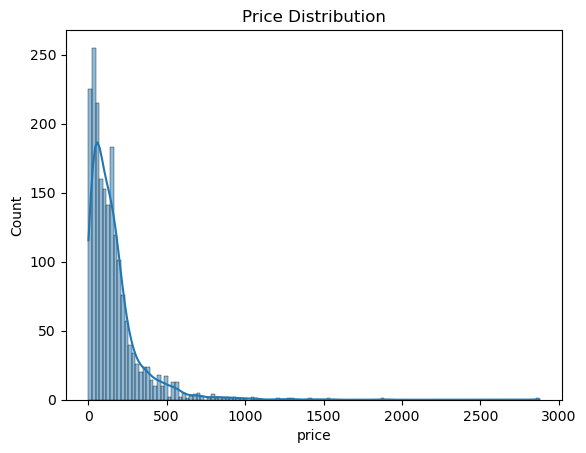

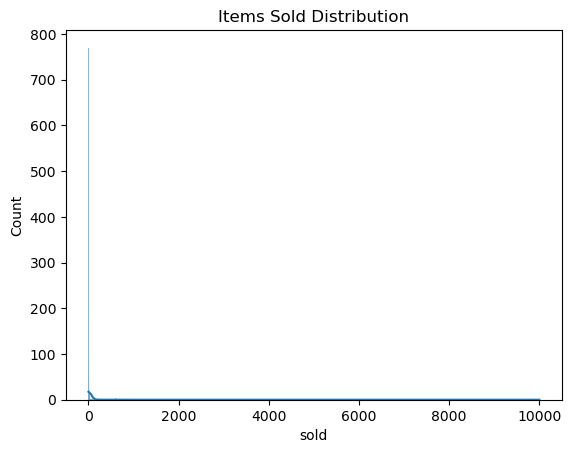

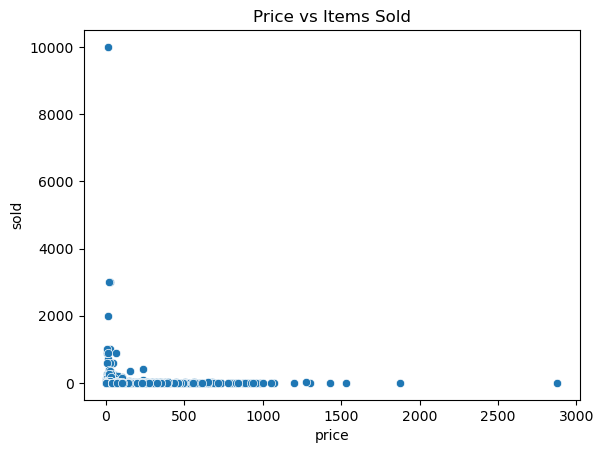

In [5]:
# EDA
# 1) Price Distribution
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()

# 2) Sold Distribution 
sns.histplot(df['sold'], kde=True)
plt.title("Items Sold Distribution")
plt.show()

# 3) Price vs Sold
sns.scatterplot(x='price', y='sold', data=df)
plt.title("Price vs Items Sold")
plt.show()



In [6]:
# Feature Engineering
tfidf = TfidfVectorizer(max_features=100)

title_tfidf = tfidf.fit_transform(df['productTitle'])

title_df = pd.DataFrame(
    title_tfidf.toarray(),
    columns=tfidf.get_feature_names_out()
)

df = pd.concat([df, title_df], axis=1)

df.drop('productTitle', axis=1, inplace=True)


In [7]:
# Train Test Split
X = df.drop('sold', axis=1)
y = df['sold']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
# Model Training
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# Model Evaluation 
# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Metrics
print("Linear Regression MSE:",
      mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:",
      r2_score(y_test, y_pred_lr))

print("Random Forest MSE:",
      mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:",
      r2_score(y_test, y_pred_rf))



Linear Regression MSE: 13477.83895274515
Linear Regression R2: -1.4578813375484216
Random Forest MSE: 18487.71419451139
Random Forest R2: -2.371505465522966
